<a href="https://colab.research.google.com/github/hyrycena/trabalhoTitanic/blob/main/TrabalhoJuscelino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", font_scale=1.75)

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")



In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.   Passengerird: Identificador único para cada passageiro;
2.   Survived: Indica se o passageiro sobreviveu, onde (0-Não; 1.-Sim)
3.   Pclass: Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;
4.  Name: Nome do passageiro;
5.   Sex: Sexo do passageiro;
6.   Age: Idade do passageiro;
7.   SibSp: Número de irmãos - esposas a bordo;
8.   Parch: Numero de pais-filhos a bordo;
9.   Ticket: Número da passagem;
10.   Fare: Preço da passagem;
11.   Cabin: Cabine;
12.   Embarked: Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)







In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Com o comando describe vemos que sobreviveram mais ou menos 38% dos passageiros e suas idades  estão entre 0 e 80 anos.

In [ ]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Os dados mostram que temos 687 cabines vazias, 177 idades de passageiros não identificadas e 2 pessoas que não embarcarm.

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As colunas com valores nulos são: Age, Cabin e Embarked



In [ ]:
(train_df.isnull().sum() / len(train_df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

 77% das cabines estão vazias

In [ ]:
train_df.drop('Cabin', axis='columns', inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
train_df.dropna(subset=['Embarked'], inplace=True)
(train_df.isnull().sum() / len(train_df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

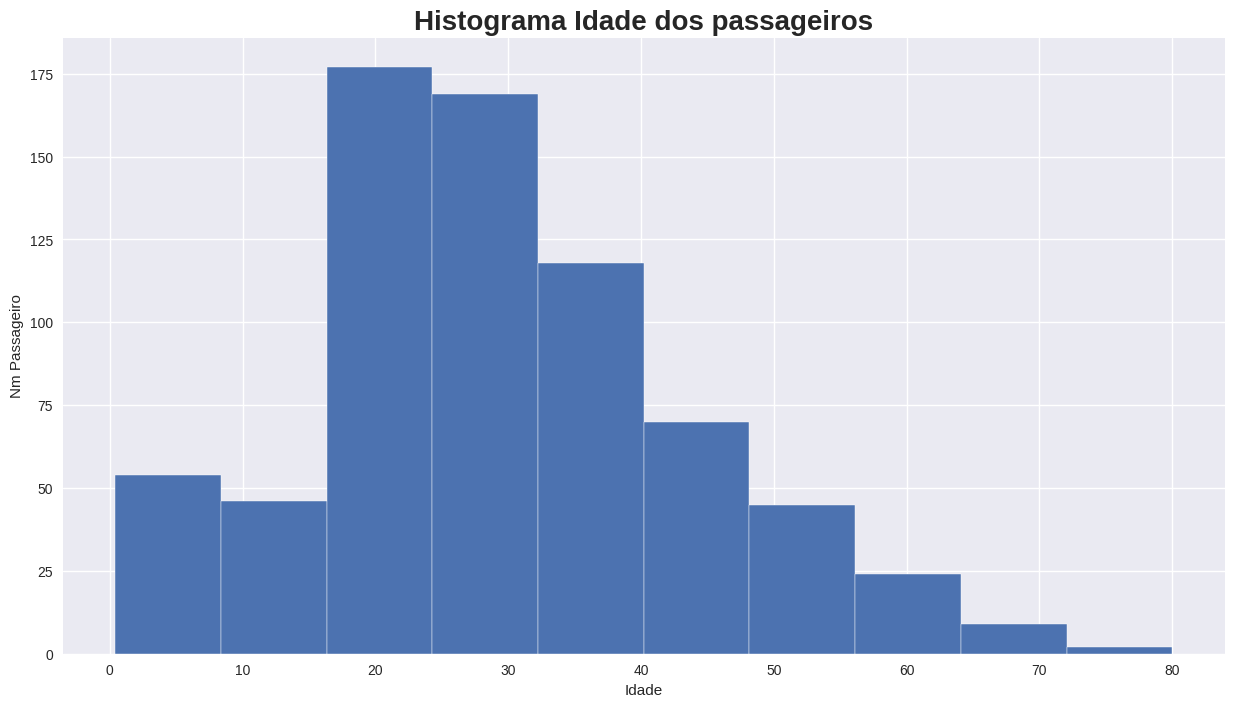

In [48]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')
plt.hist(train_df.Age)
plt.xlabel("Idade")
plt.ylabel("Nm Passageiro")

plt.show()

A maior quantidade de pessoa está entre as idade de 20 e 30 anos

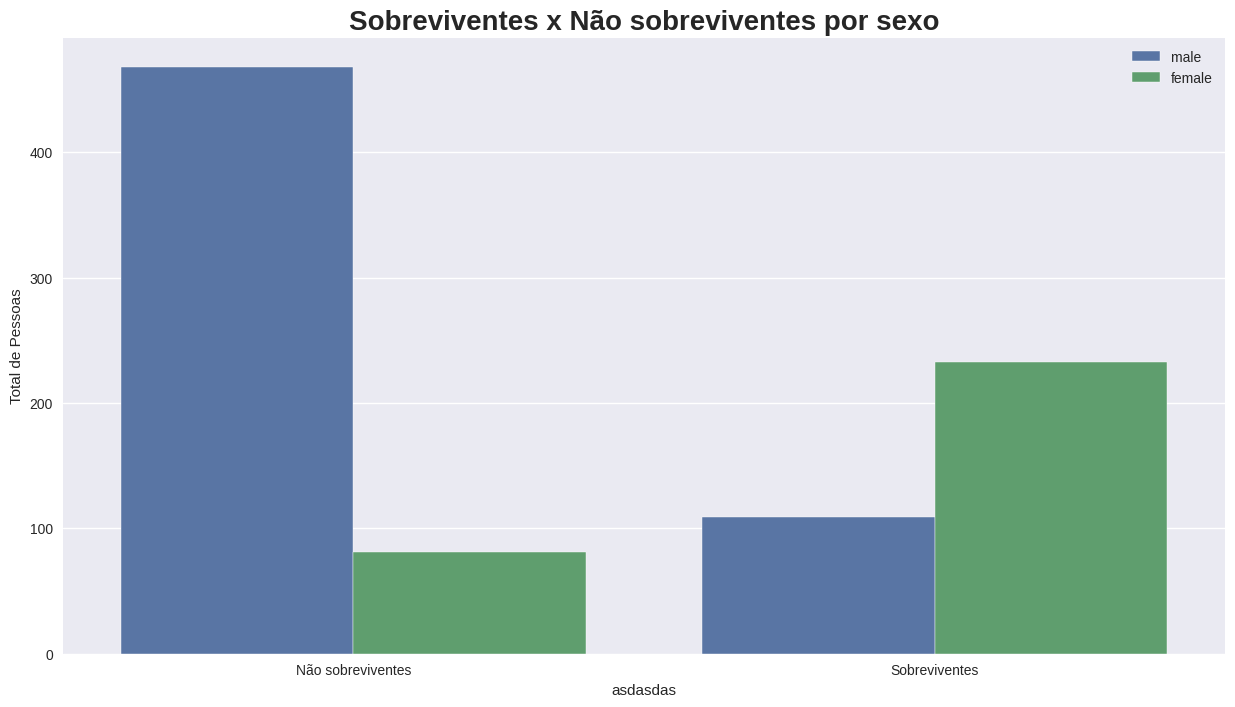

In [49]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
g = sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.legend(loc='upper right')
g.set(ylabel="Total de Pessoas", xlabel="asdasdas", xticklabels=["Não sobreviventes", "Sobreviventes"])
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')
plt.show()

A grande parte dos mortos, eram do sexo masculino.

<Figure size 1800x1000 with 0 Axes>

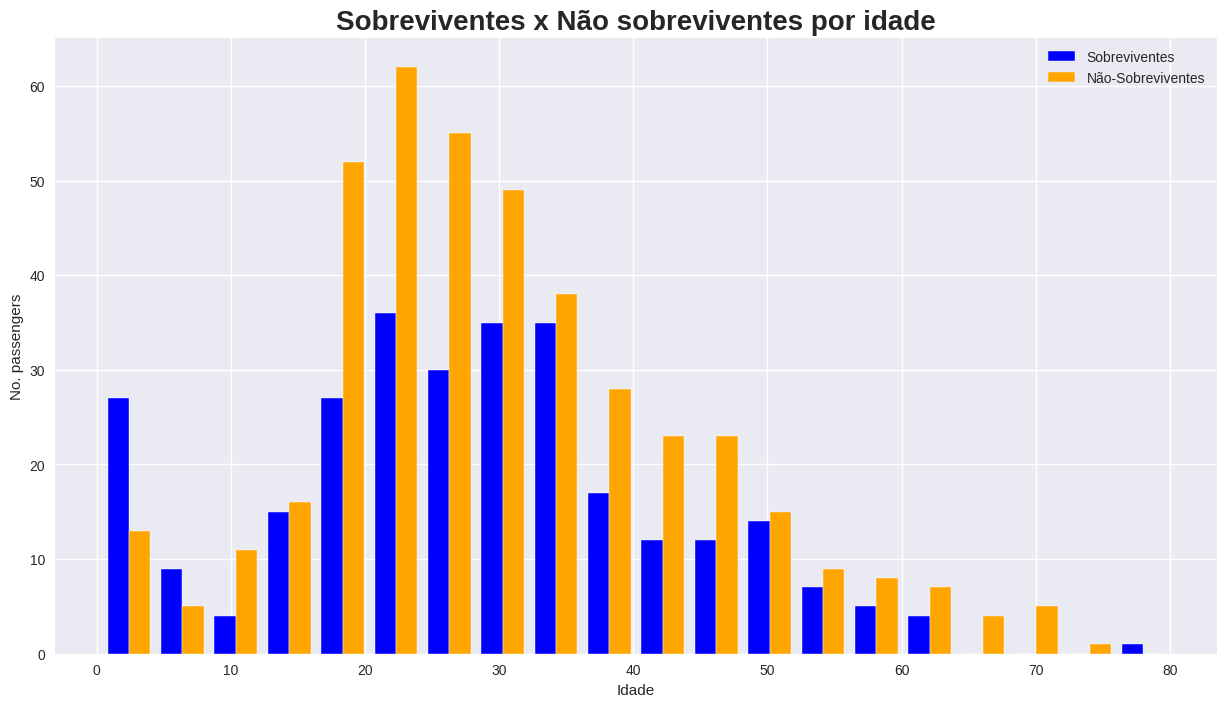

In [61]:
plt.figure( figsize=(18, 10) )

plt.style.use('seaborn')

figure = plt.figure(figsize=(15,8))
plt.hist([train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']],
         stacked=False, color=['blue','orange'],
         bins=20, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend();


A maior taxa de não sobreviventes por idade está nas pessoas acima de 60 anos, e que mais sobreviveram ao desastre foi está entre a faixa dos 30 aos 40 anos.

<Axes: xlabel='Embarked', ylabel='Survived'>

<Figure size 1500x800 with 0 Axes>

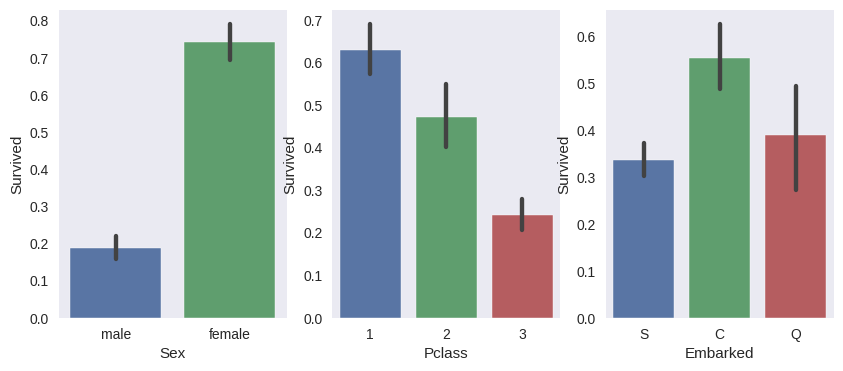

In [51]:
plt.figure( figsize=(15, 8) )

plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3)

Os grupos com mais chances de sobreviver nas coluna:

Sex
1. 75% de mulheres sobreviveram
2. 19% de homens sobreviveram

Pclass
1. As pessoas de 1° classe tem 64% de chance de sobreviverem
2. As pessoas de 2° classe tem 47% de chance de sobreviverem
3. As pessoas de 3° classe tem 23% de chance de sobreviverem

Embarked
1. As pessoas que embarcaram em Southampton tem 34% de chance de sobreviverem
2. As pessoas que embarcaram em Cherbourg tem 55% de chance de sobreviverem
3. As pessoas que embarcaram em Queenstown tem 39% de chance de sobreviverem

<Figure size 2000x800 with 0 Axes>

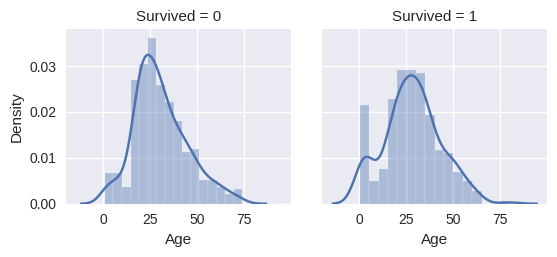

In [52]:
plt.figure(figsize=(20, 8))
plt.style.use('seaborn')
ageSurvived = sns.FacetGrid(train_df, col='Survived')
ageSurvived.map(sns.distplot, "Age")


A um enorme pecentual de crianças que sobreviveram eram da faixa de 0 a 5 anos.



> Preço do Ticket



Text(0.5, 1.0, 'Sobreviventes x Preço do Ticket')

<Figure size 2000x800 with 0 Axes>

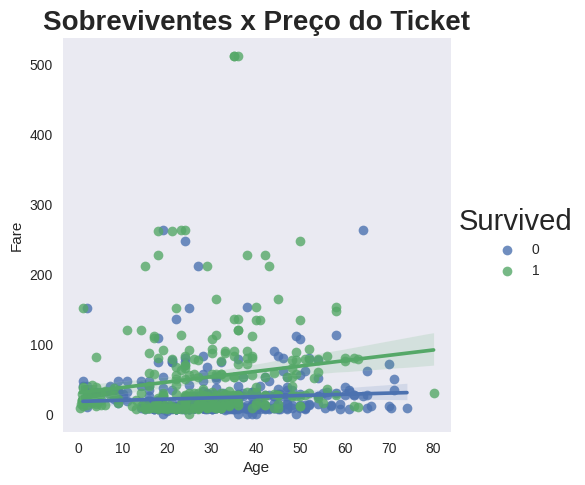

In [60]:
plt.figure(figsize=(20, 8))
sns.lmplot(data=train_df, x='Age', y='Fare', hue='Survived', )
plt.title('Sobreviventes x Preço do Ticket', fontsize=20, fontweight='bold')


Vwmos que muitos dos passageiros compram tickets abaixo dos 100 e muitos dos passageiros são da faixa de 40 a 10 anos

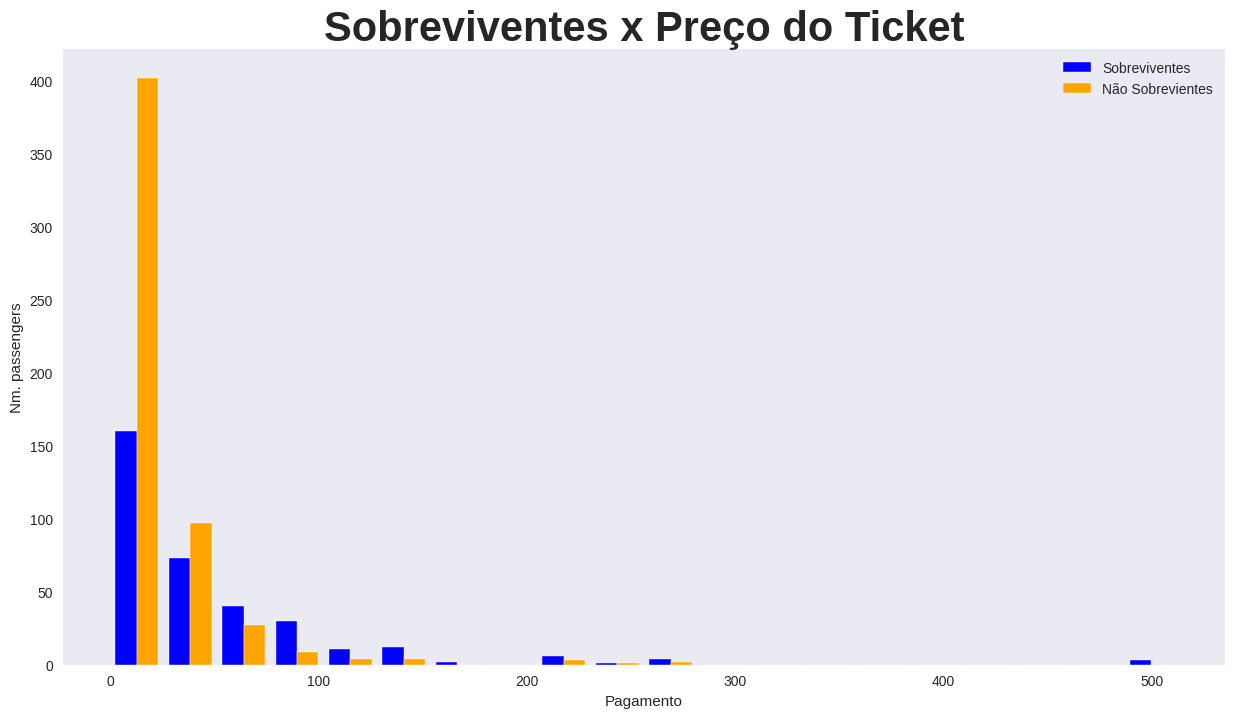

In [54]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']],
         stacked=False, color=['blue','orange'],
         bins=20, label=['Sobreviventes','Não Sobrevientes'])
plt.xlabel('Pagamento')
plt.ylabel('Nm. passengers')

plt.title('Sobreviventes x Preço do Ticket', fontsize=30, fontweight='bold')

plt.legend();

A maior parte dos sobrevientes foram as pessoas que pagaram entre 0 a 30


In [62]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(train_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': train_df.PassengerId, 'Survived': predictions})
output.to_csv('result.csv', index=False)
print("Your result was successfully saved!")

titanic_result = pd.read_csv("result.csv")

titanic_result

Your result was successfully saved!


,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,0
